# *analyzing*

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, zscore
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, LearningCurveDisplay, learning_curve
from mlxtend.plotting import plot_learning_curves
from sklearn.feature_selection import chi2, SelectKBest, f_classif

In [ ]:
drive.mount('/content/drive')
df_train = pd.read_csv('../titanic/train.csv')
df_test = pd.read_csv('../titanic/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(df_train.shape, df_test.shape)

(891, 12) (418, 11)


In [ ]:
df_test['Survived'] = np.NaN

In [ ]:
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,NaN


In [ ]:
all_data = df_train.append(df_test)

In [ ]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
all_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
print(df_train.shape, df_test.shape, all_data.shape)

(891, 12) (418, 12) (1309, 12)


In [ ]:
all_data.info() # mixed dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [ ]:
all_data.describe() # numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
all_data.describe(include=['O']) # object columns

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


Check duplicated columns

In [ ]:
all_data = all_data.drop_duplicates(keep='first')
all_data.shape

(1309, 12)

Check duplicated rows

In [ ]:
all_data[all_data.duplicated()]
all_data.shape

(1309, 12)

Handling spaces

In [ ]:
all_data = all_data.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check upper-lower case

In [ ]:
all_data = all_data.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"braund, mr. owen harris",male,22.0,1,0,a/5 21171,7.2500,NaN,s
1,2,1.0,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,pc 17599,71.2833,c85,c
2,3,1.0,3,"heikkinen, miss. laina",female,26.0,0,0,ston/o2. 3101282,7.9250,NaN,s
3,4,1.0,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,c123,s
4,5,0.0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,NaN,s


Check special characters

In [ ]:
import string
alphabet = string.ascii_letters+string.punctuation

In [ ]:
all_data.columns.str.strip(alphabet).astype(bool).any()

False

Check null values

In [ ]:
all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<Axes: >

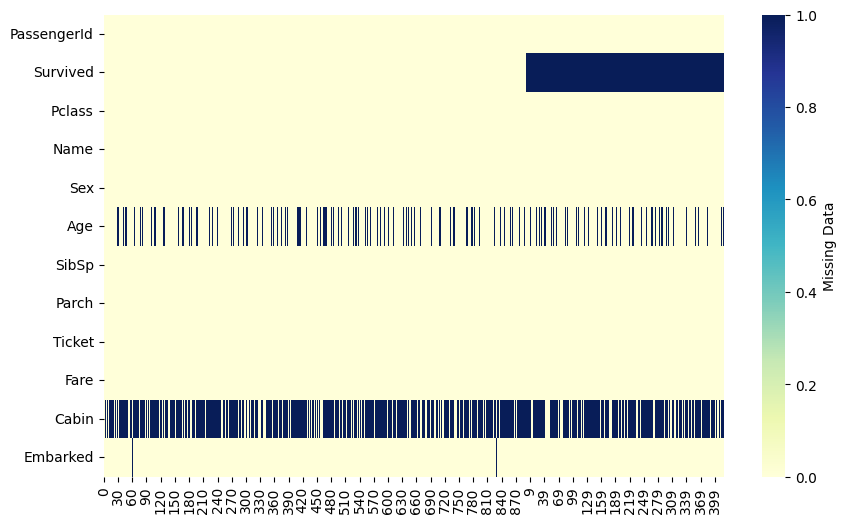

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(all_data.isna().transpose(),
cmap="YlGnBu",
cbar_kws={'label': 'Missing Data'})

Check data is Imbalanced or not

<Axes: >

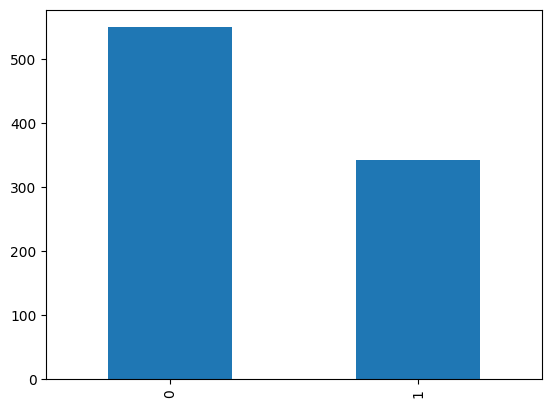

In [ ]:
df_train['Survived'].value_counts().plot(kind='bar')

Drop columns

In [ ]:
all_data.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True) # Name, passenger id and ticket are unnecessary, cabin has too many null values.

In [ ]:
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,s
1,2,1.0,1,female,38.0,1,0,71.2833,c
2,3,1.0,3,female,26.0,0,0,7.9250,s
3,4,1.0,1,female,35.0,1,0,53.1000,s
4,5,0.0,3,male,35.0,0,0,8.0500,s


# *age*

Fill null values with mean

In [ ]:
all_data['Age'].fillna(all_data['Age'].mean(), inplace=True)
all_data['Age'].isnull().sum()

0

In [ ]:
df_train = all_data[:891]
df_test = all_data[891:]
df_train.shape, df_test.shape

((891, 9), (418, 9))

Check outliers for age column in train dataset

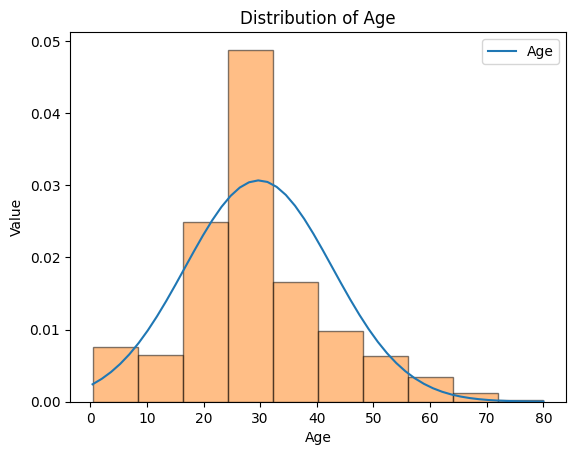

In [ ]:
domain = np.linspace(np.min(df_train['Age']), np.max(df_train['Age']))
plt.plot(domain, norm.pdf(domain, df_train['Age'].mean(), df_train['Age'].std()), label='Age')
plt.hist(df_train['Age'], edgecolor='black', alpha=0.5, density=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# Data is normally distributed so I can use z_score for handling outliers
upper_limit = df_train['Age'].mean() + 3*df_train['Age'].std()
lower_limit = df_train['Age'].mean() - 3*df_train['Age'].std()
upper_limit, lower_limit

(68.7419313273417, -9.271378314742794)

In [ ]:
df_train.loc[(df_train['Age'] > upper_limit) | (df_train['Age'] < lower_limit)] # drop 7 rows

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
96,97,0.0,1,male,71.0,0,0,34.6542,c
116,117,0.0,3,male,70.5,0,0,7.7500,q
493,494,0.0,1,male,71.0,0,0,49.5042,c
630,631,1.0,1,male,80.0,0,0,30.0000,s
672,673,0.0,2,male,70.0,0,0,10.5000,s
745,746,0.0,1,male,70.0,1,1,71.0000,s
851,852,0.0,3,male,74.0,0,0,7.7750,s


In [ ]:
df_train = df_train.loc[(df_train['Age'] < upper_limit) & (df_train['Age'] > lower_limit)]
df_train.shape

(884, 9)

In [ ]:
# update all_data with new df_train

all_data = all_data[891:]
all_data.shape # just test dataset left

(418, 9)

In [ ]:
all_data['Survived'].value_counts()

Series([], Name: Survived, dtype: int64)

In [ ]:
all_data = pd.DataFrame(df_train, columns=all_data.columns).append(all_data, ignore_index=True)
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,s
1,2,1.0,1,female,38.0,1,0,71.2833,c
2,3,1.0,3,female,26.0,0,0,7.9250,s
3,4,1.0,1,female,35.0,1,0,53.1000,s
4,5,0.0,3,male,35.0,0,0,8.0500,s


In [ ]:
all_data.shape # dropped 7 outliers

(1302, 9)

Age groups in the train and test datasets must be the same. Because an age that belongs to the 3rd group in the train dataset may belong to the 4th group in the test dataset.

In [ ]:
all_data['AgeBand'] = pd.cut(all_data['Age'], 4)
all_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

,AgeBand,Survived
0,"(0.0942, 19.128]",0.481707
1,"(19.128, 38.085]",0.358182
2,"(38.085, 57.043]",0.388889
3,"(57.043, 76.0]",0.346154


In [ ]:
all_data.loc[all_data['Age']<=20,'Age']=0
all_data.loc[(all_data['Age']>20)&(all_data['Age']<=39),'Age']=1
all_data.loc[(all_data['Age']>39)&(all_data['Age']<=58),'Age']=2
all_data.loc[(all_data['Age']>58)&(all_data['Age']<=76),'Age']=3

In [ ]:
all_data['Age'] = all_data['Age'].apply(np.ceil).astype('int64') # A person's age can not be float. Round up. Must be integer. Convert it to int64.

In [ ]:
all_data['Age'].unique()

array([1, 2, 0, 3])

In [ ]:
all_data.drop(['AgeBand'], axis=1, inplace=True)
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,1,1,0,7.2500,s
1,2,1.0,1,female,1,1,0,71.2833,c
2,3,1.0,3,female,1,0,0,7.9250,s
3,4,1.0,1,female,1,1,0,53.1000,s
4,5,0.0,3,male,1,0,0,8.0500,s


In [ ]:
all_data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Sex             object
Age              int64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [ ]:
all_data.shape

(1302, 9)

In [ ]:
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,1,1,0,7.2500,s
1,2,1.0,1,female,1,1,0,71.2833,c
2,3,1.0,3,female,1,0,0,7.9250,s
3,4,1.0,1,female,1,1,0,53.1000,s
4,5,0.0,3,male,1,0,0,8.0500,s


In [ ]:
df_train = all_data[:884] # to continue with new changes in the train dataset.

# *fare*

Fill null values with mean

In [ ]:
all_data['Fare'].fillna(all_data['Fare'].mean(), inplace=True)
all_data['Fare'].isnull().sum()

0

Check outliers for fare column in train dataset

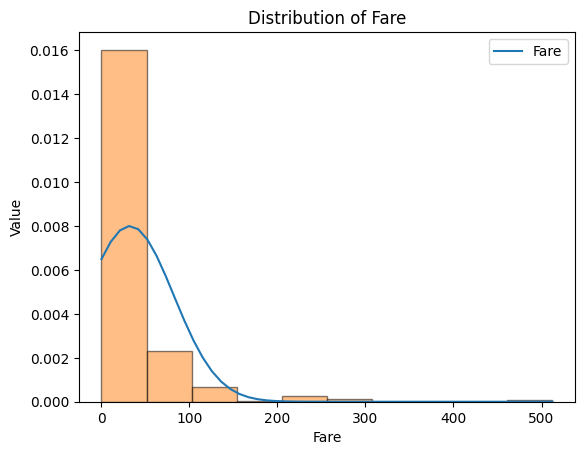

In [ ]:
domain = np.linspace(np.min(df_train['Fare']), np.max(df_train['Fare']))
plt.plot(domain, norm.pdf(domain, df_train['Fare'].mean(), df_train['Fare'].std()), label='Fare')
plt.hist(df_train['Fare'], edgecolor='black', alpha=0.5, density=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# positively skewed and imbalance data. I can use IQR method.
Q1 = df_train.Fare.quantile(0.05)
Q3 = df_train.Fare.quantile(0.95)
IQR = Q3 - Q1

In [ ]:
min_threshold = Q1 - 1.5*IQR
max_threshold = Q3 + 1.5*IQR
min_threshold, max_threshold

(-151.3118674999997, 271.45311249999946)

In [ ]:
df_train[(df_train['Fare'] > max_threshold) | (df_train['Fare'] < min_threshold)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
256,259,1.0,1,female,1,0,0,512.3292,c
674,680,1.0,1,male,1,0,1,512.3292,c
732,738,1.0,1,male,1,0,0,512.3292,c


In [ ]:
df_train = df_train.loc[(df_train['Fare'] < max_threshold) & (df_train['Fare'] > min_threshold)]
df_train.shape # dropped 3 columns

(881, 9)

In [ ]:
# update all_data with new df_train

all_data = all_data[884:]
all_data.shape

(418, 9)

In [ ]:
all_data = pd.DataFrame(df_train, columns=all_data.columns).append(all_data, ignore_index=True)
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,1,1,0,7.2500,s
1,2,1.0,1,female,1,1,0,71.2833,c
2,3,1.0,3,female,1,0,0,7.9250,s
3,4,1.0,1,female,1,1,0,53.1000,s
4,5,0.0,3,male,1,0,0,8.0500,s


In [ ]:
all_data.shape # dropped 3 outliers

(1299, 9)

Same as age, fare groups in the train and test datasets must be the same.

In [ ]:
all_data['FareBand'] = pd.cut(all_data['Fare'], 4)
all_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 128.082]",0.369976
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",NaN


In [ ]:
all_data.loc[all_data['Fare']<=129,'Fare']=0
all_data.loc[(all_data['Fare']>129)&(all_data['Fare']<=257),'Fare']=1
all_data.loc[(all_data['Fare']>257)&(all_data['Fare']<=385),'Fare']=2
all_data.loc[(all_data['Fare']>385)&(all_data['Fare']<=513),'Fare']=3

In [ ]:
all_data['Fare'] = all_data['Fare'].astype(int)

In [ ]:
all_data['Fare'].unique()

array([0, 2, 1, 3])

In [ ]:
all_data.drop(['FareBand'], axis=1, inplace=True)
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,1,1,0,0,s
1,2,1.0,1,female,1,1,0,0,c
2,3,1.0,3,female,1,0,0,0,s
3,4,1.0,1,female,1,1,0,0,s
4,5,0.0,3,male,1,0,0,0,s


In [ ]:
all_data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Sex             object
Age              int64
SibSp            int64
Parch            int64
Fare             int64
Embarked        object
dtype: object

# *embarked*

In [ ]:
all_data['Embarked'].unique() # 2 nan columns fill with mode
all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace=True)

In [ ]:
all_data['Embarked'].value_counts()

s    912
c    265
q    122
Name: Embarked, dtype: int64

In [ ]:
all_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,c,0.552147
1,q,0.394737
2,s,0.339564


In [ ]:
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,1,1,0,0,s
1,2,1.0,1,female,1,1,0,0,c
2,3,1.0,3,female,1,0,0,0,s
3,4,1.0,1,female,1,1,0,0,s
4,5,0.0,3,male,1,0,0,0,s


# *parch*

In [ ]:
all_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.551724
2,2,0.500000
0,0,0.343284
5,5,0.200000
4,4,0.000000
6,6,0.000000
7,9,NaN


# *SibSp*

In [ ]:
all_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.343907
1,1,0.538462
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


SibSp and Parch have 0 correlations in some cases. They have good correlation with each other. I will use these columns for extracting new features.

In [ ]:
all_data['family'] = all_data[['Parch', 'SibSp']].sum(axis=1)

In [ ]:
all_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [ ]:
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,1,0.0,3,male,1,0,s,1
1,2,1.0,1,female,1,0,c,1
2,3,1.0,3,female,1,0,s,0
3,4,1.0,1,female,1,0,s,1
4,5,0.0,3,male,1,0,s,0


# *sex*

In [ ]:
all_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.741214
1,male,0.186620


# *Pclass*

In [ ]:
all_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.631579
1,2,0.475410
2,3,0.243354


# *dummy variables*

In [ ]:
all_data = pd.get_dummies(all_data, columns = ['Sex', 'Embarked'], dtype='int', drop_first='True') # dtype=int

In [ ]:
all_data.head()

,PassengerId,Survived,Pclass,Age,Fare,family,Sex_male,Embarked_q,Embarked_s
0,1,0.0,3,1,0,1,1,0,1
1,2,1.0,1,1,0,1,0,0,0
2,3,1.0,3,1,0,0,0,0,1
3,4,1.0,1,1,0,1,0,0,1
4,5,0.0,3,1,0,0,1,0,1


# *splitting data*

In [ ]:
df_train = all_data[:881] # # We have 881 rows in training data
df_test = all_data[881:] # We have 418 rows in test data
all_data.shape, df_train.shape, df_test.shape

((1299, 9), (881, 9), (418, 9))

In [ ]:
df_test['Survived'].value_counts() # Drop this column
passenger_id = df_test[:891].PassengerId # for submission
df_test.drop(['PassengerId'], axis=1, inplace=True)

In [ ]:
df_train.drop(['PassengerId'], axis=1, inplace=True)
# convert df_train['Survived'] column to int because when we add NaN values, column converted to float.
df_train['Survived'] = df_train['Survived'].astype(int)

In [ ]:
df_test.drop(['Survived'], axis=1, inplace=True)

X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# *scaling*

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train) # some algorithms don't need to be scaled. (Gaussian Naive Bayes, Decision Tree, Random Forest)
X_test_scaled = sc.fit_transform(X_test)

X_test_data_scaled = sc.fit_transform(df_test)

# *train models in chunk form*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
random_state = 42
log_reg = LogisticRegression(random_state=random_state) # scaled
nb = GaussianNB() # not scaled
svc = SVC(probability=True, random_state=random_state) # scaled
dt = DecisionTreeClassifier(random_state=random_state) # not scaled
rf = RandomForestClassifier(random_state=random_state) # not scaled
knn = KNeighborsClassifier() # scaled
gb = GradientBoostingClassifier(random_state=42) # not scaled

log_reg_parameters = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

nb_parameters = {
    'var_smoothing': np.logspace(0,-9, num=100)
    }

svm_parameters = {
          'C': [0.1, 1, 10, 100, 1000],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
          'kernel': ['rbf'] # 'linear' calculation time too long.
                  }

dt_parameters = [
              {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}
              ]

rf_parameters = [
    {'n_estimators': [10, 25], 'max_features': [5, 10],
     'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

knn_parameters = [
    {
    'n_neighbors': [5, 11, 33, 55, 115, 291, 341],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto'],
    'leaf_size': [1, 5, 10, 20, 30]
    }
]

gb_parameters = [
    {'n_estimators':range(10,100,10)}
]

In [ ]:
accuracy = []
models = [log_reg, nb, svc, dt, rf, knn, gb]
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
parameters = [log_reg_parameters, nb_parameters, svm_parameters, dt_parameters, rf_parameters, knn_parameters, gb_parameters]
tuned_models = []

def train_models(model, parameters):

  grid = GridSearchCV(estimator=model, param_grid=parameters, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=True)
  if model == log_reg or model == svc or model == knn:
    model.fit(X_train_scaled, y_train)
    accuracy.append([str(model), round(accuracy_score((model.predict(X_test_scaled)), y_test) * 100, 2)])
    accuracy.append([str(model)+' cv accuracy', round(cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy').mean() * 100, 2)])
    grid = grid.fit(X_train_scaled, y_train) # scaled train data
    best_estimator = grid.best_estimator_
    tuned_models.append(best_estimator)
    accuracy.append([str(model)+' tuned accuracy', round(cross_val_score(best_estimator, X_train_scaled, y_train, cv=kfold, scoring='accuracy').mean()* 100, 2)])
  else:
    model.fit(X_train, y_train)
    accuracy.append([str(model), round(accuracy_score((model.predict(X_test)), y_test) * 100, 2)])
    accuracy.append([str(model)+' cv accuracy', round(cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy').mean()* 100, 2)])
    grid = grid.fit(X_train, y_train) # scaled train data
    best_estimator = grid.best_estimator_
    tuned_models.append(best_estimator)
    accuracy.append([str(model)+' tuned accuracy', round(cross_val_score(best_estimator, X_train, y_train, cv=kfold, scoring='accuracy').mean()* 100, 2)])
  return accuracy

In [ ]:
counter = 0
for i in models:
  train_models(i, parameters[counter])
  counter = counter + 1

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 25 candidates, totalling 250 fits
Fitting 10 folds for each of 1200 candidates, totalling 12000 fits
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Fitting 10 folds for each of 70 candidates, totalling 700 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [ ]:
df_scores = pd.DataFrame(accuracy, columns=['Model', 'Accuracy'])
df_scores.sort_values(by=['Accuracy'], ascending=False).style.highlight_max(color='green', axis=0, subset=['Accuracy']).hide_index()

Model,Accuracy
DecisionTreeClassifier(random_state=42) tuned accuracy,83.650000
GradientBoostingClassifier(random_state=42) tuned accuracy,82.940000
KNeighborsClassifier() tuned accuracy,81.240000
KNeighborsClassifier() cv accuracy,81.240000
LogisticRegression(random_state=42) cv accuracy,80.950000
LogisticRegression(random_state=42) tuned accuracy,80.950000
RandomForestClassifier(random_state=42) tuned accuracy,80.820000
"SVC(probability=True, random_state=42) tuned accuracy",80.810000
GradientBoostingClassifier(random_state=42) cv accuracy,80.670000
RandomForestClassifier(random_state=42) cv accuracy,80.670000


# *learning curves*

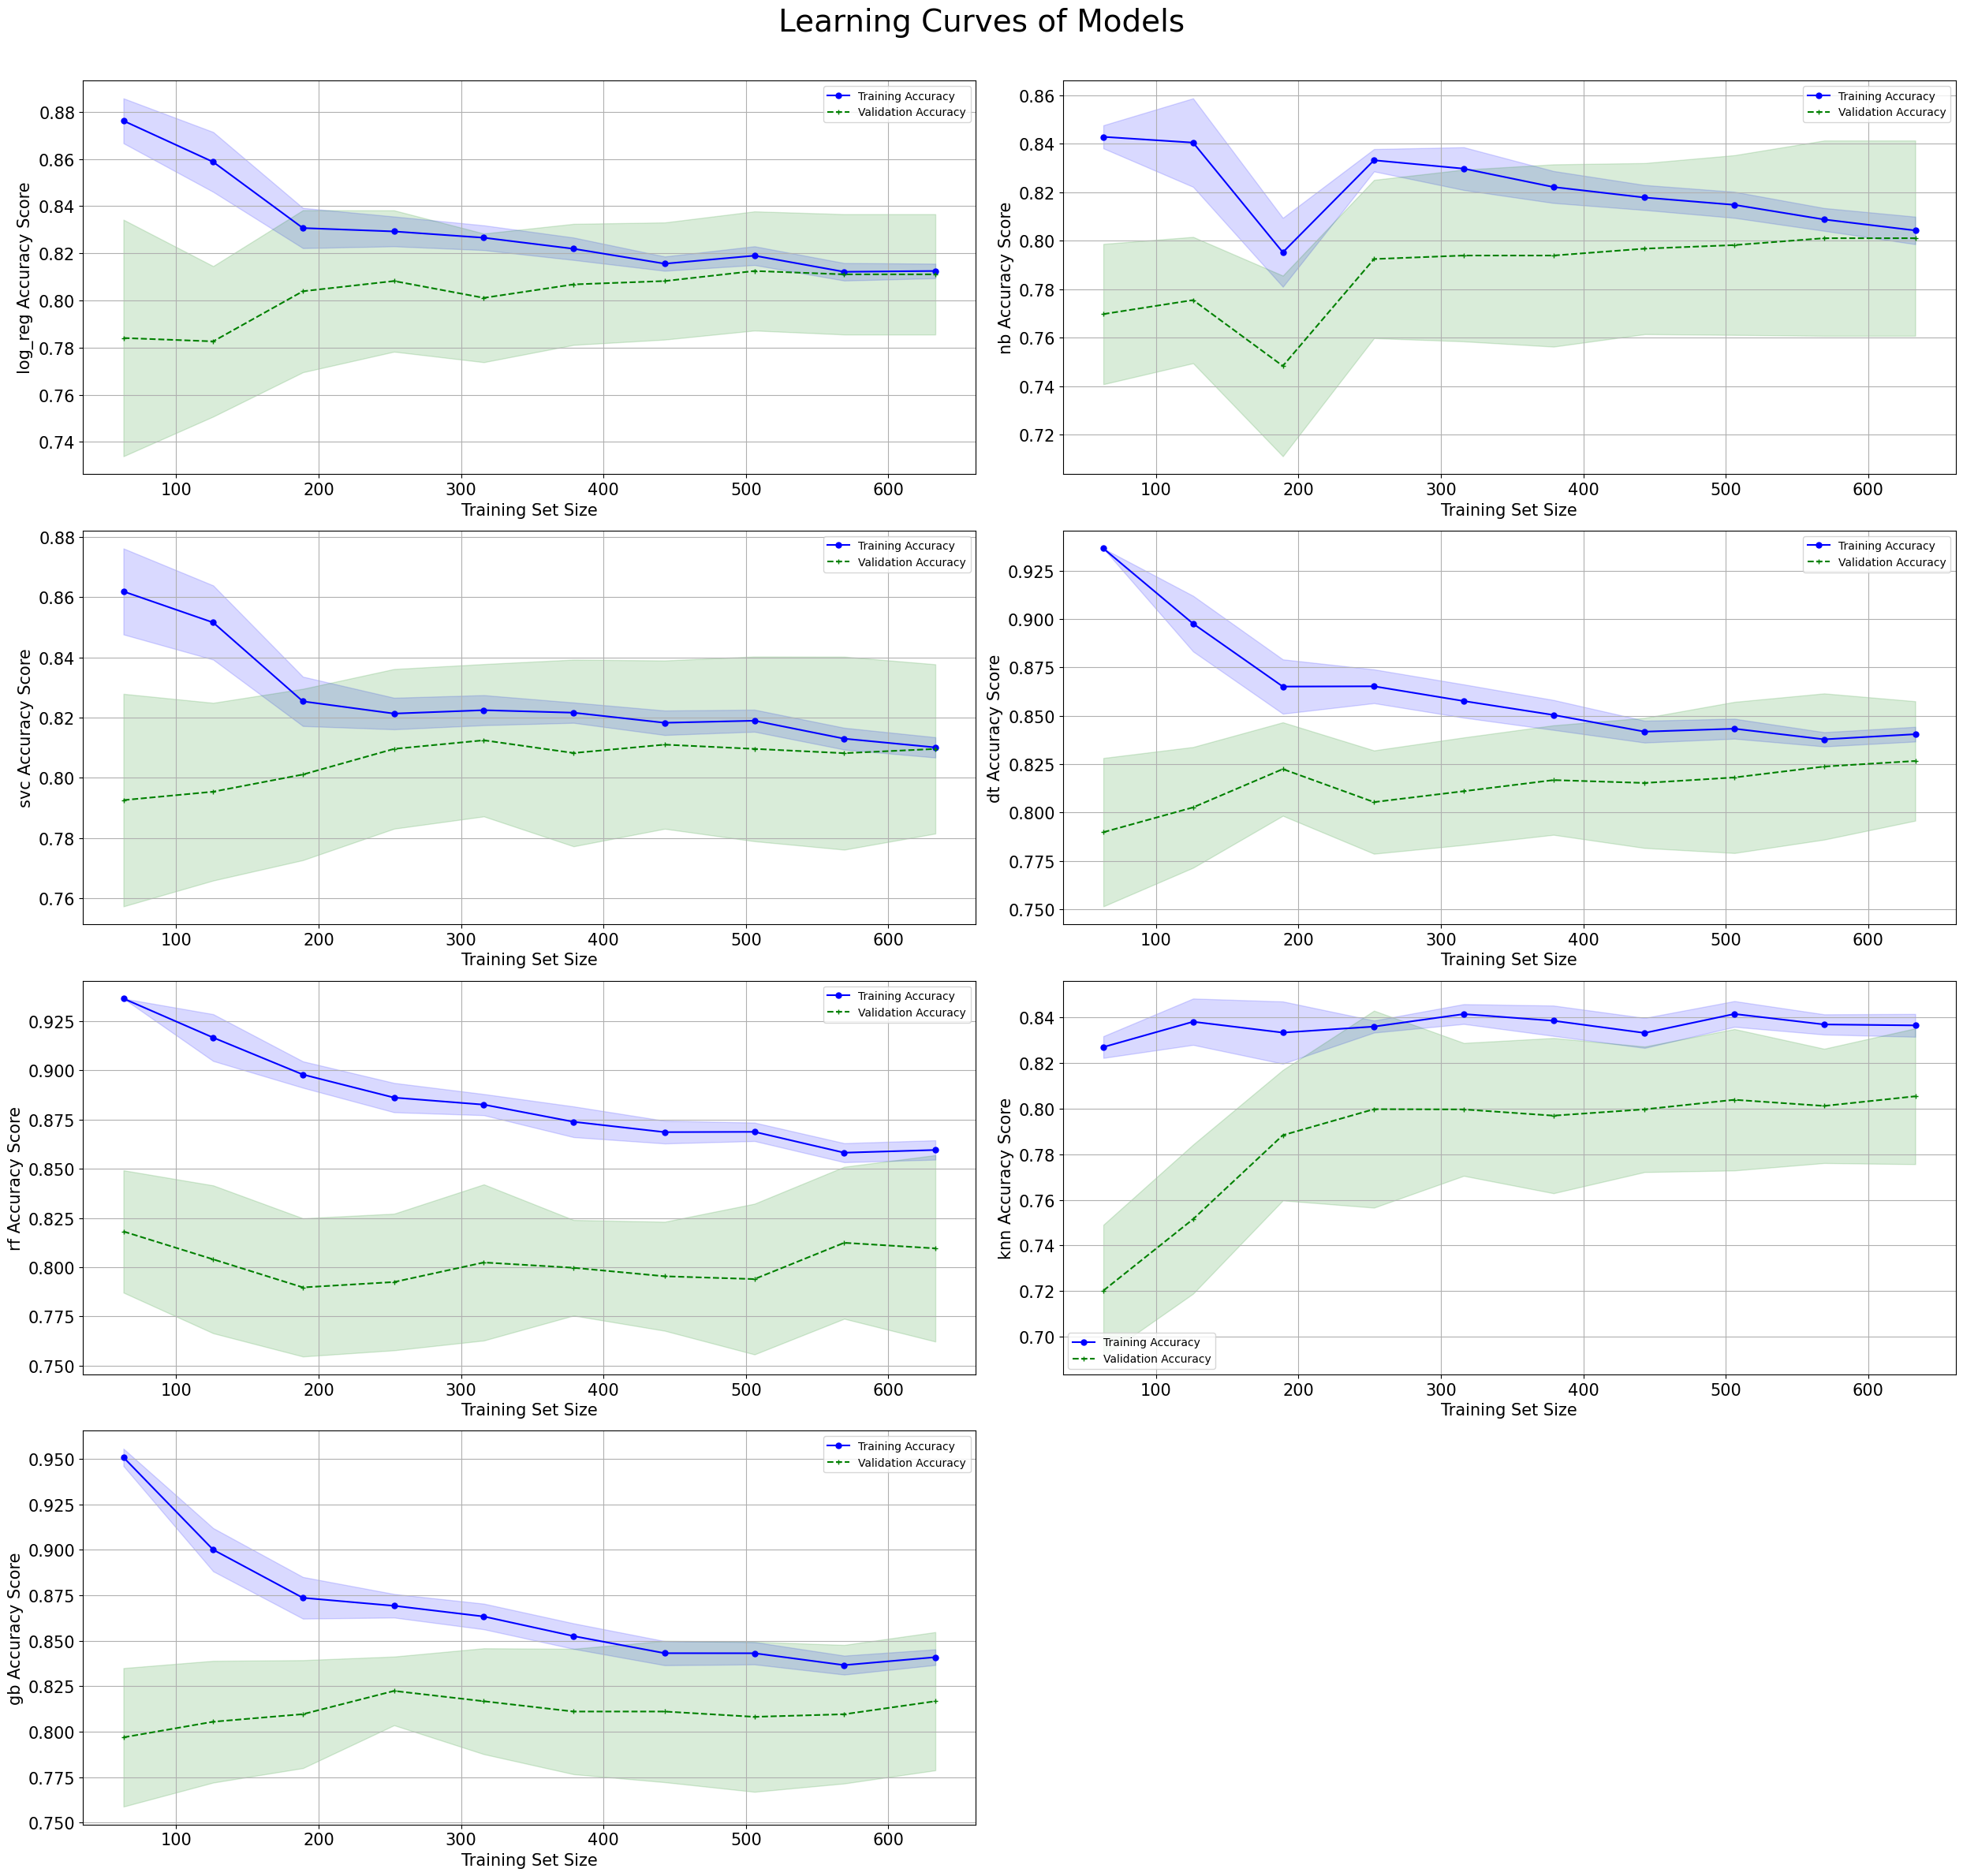

In [ ]:
plt.figure(figsize = (25,25))
labels = ['log_reg', 'nb', 'svc', 'dt', 'rf', 'knn', 'gb']

for ax, model, label in zip (range(1,8), tuned_models, labels):
  plt.subplot(4,2,ax)
  if 'LogisticRegression' in str(i) or 'SVC' in str(i) or 'KNeighborsClassifier' in str(i): # scaled data
    train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train_scaled, y=y_train,
                                                          cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                          n_jobs=1)
  else: # unscaled data
    train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train,
                                                          cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                          n_jobs=1)

  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
  plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
  plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
  plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

  plt.xlabel('Training Set Size', fontsize=15)
  plt.ylabel(label+' Accuracy Score', fontsize=15)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.legend(loc = 'best')
  plt.grid()

plt.suptitle('Learning Curves of Models', fontsize = 28)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])

# *confusion_matrix*

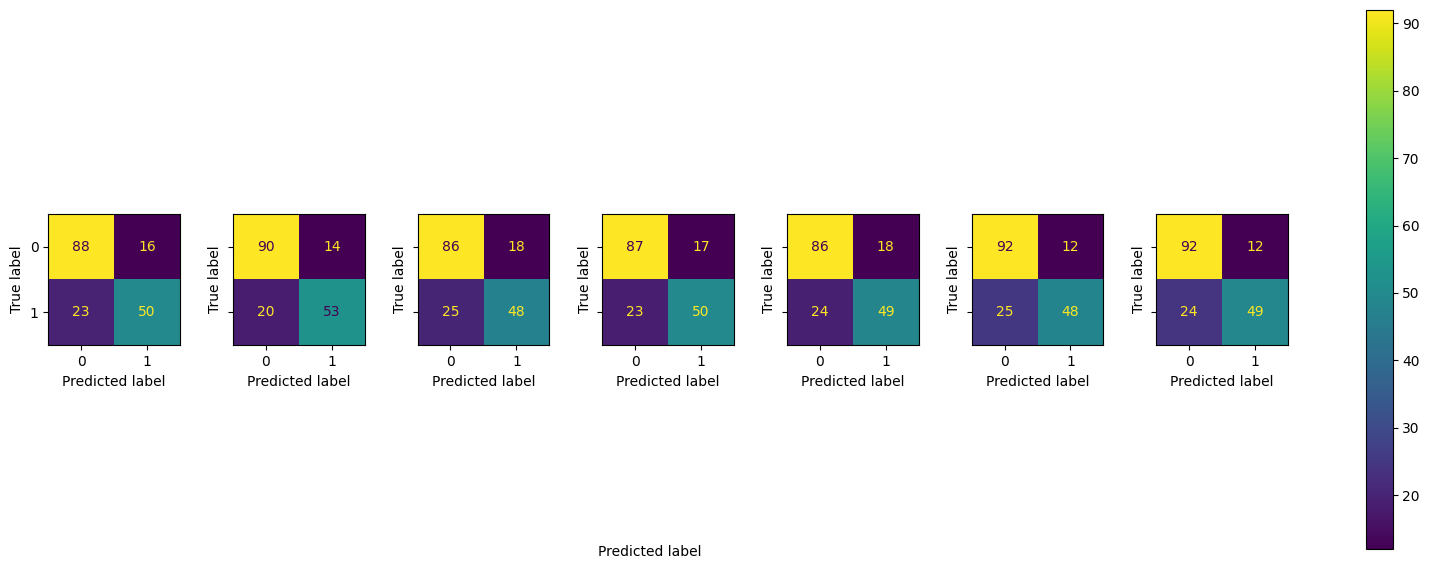

In [ ]:
f, axes = plt.subplots(1, 7, figsize=(20, 7), sharey='row')
counter = 0
for i in tuned_models:
    if 'LogisticRegression' in str(i) or 'SVC' in str(i) or 'KNeighborsClassifier' in str(i): # scaled data
      disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, (i.predict(X_test_scaled))),
                                  display_labels=i.classes_)
    else: # not scaled data
      disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, (i.predict(X_test))),
                                  display_labels=i.classes_)

    disp.plot(ax=axes[counter])
    # disp.ax_.set_title(str(i))
    disp.im_.colorbar.remove()
    counter = counter + 1

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()